# Model 5 - Fault

A simple fault model with constant offset. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = path_to_data + "model5_orientations.csv",
                        path_i = path_to_data + "model5_surface_points.csv") 

Active grids: ['regular']


In [3]:
geo_data.get_data()

X    Y    Z     X_r     Y_r     Z_r surface  \
surface_points 0      0  200  600  0.2501  0.3501  0.5501   rock1   
               1      0  800  600  0.2501  0.6501  0.5501   rock1   
               2    200  200  600  0.3501  0.3501  0.5501   rock1   
               3    200  800  600  0.3501  0.6501  0.5501   rock1   
               4    800  200  200  0.6501  0.3501  0.3501   rock1   
               5    800  800  200  0.6501  0.6501  0.3501   rock1   
               6   1000  200  200  0.7501  0.3501  0.3501   rock1   
               7   1000  800  200  0.7501  0.6501  0.3501   rock1   
               8      0  200  800  0.2501  0.3501  0.6501   rock2   
               9      0  800  800  0.2501  0.6501  0.6501   rock2   
               10   200  200  800  0.3501  0.3501  0.6501   rock2   
               11   200  800  800  0.3501  0.6501  0.6501   rock2   
               12   800  200  400  0.6501  0.3501  0.4501   rock2   
               13   800  800  400  0.6501  0.6501  0.4501   rock2   
               14  1000  200  400  0.7501  0.3501  0.4501   rock2   
               15  1000  800  400  0.7501  0.6501  0.4501   rock2   
               16   500  500  500  0.5001  0.5001  0.5001   fault   
               17   450  500  600  0.4751  0.5001  0.5501   fault   
               18   500  200  500  0.5001  0.3501  0.5001   fault   
               19   450  200  600  0.4751  0.3501  0.5501   fault   
               20   500  800  500  0.5001  0.6501  0.5001   fault   
               21   450  800  600  0.4751  0.6501  0.5501   fault   
orientations   1    100  500  600  0.3001  0.5001  0.5501   rock1   
               3    900  500  200  0.7001  0.5001  0.3501   rock1   
               0    100  500  800  0.3001  0.5001  0.6501   rock2   
               2    900  500  400  0.7001  0.5001  0.4501   rock2   
               4    500  500  500  0.5001  0.5001  0.5001   fault   

                           series  id  order_series    smooth           G_x  \
surface_points 0   Default series   1             1  0.000001           NaN   
               1   Default series   1             1  0.000001           NaN   
               2   Default series   1             1  0.000001           NaN   
               3   Default series   1             1  0.000001           NaN   
               4   Default series   1             1  0.000001           NaN   
               5   Default series   1             1  0.000001           NaN   
               6   Default series   1             1  0.000001           NaN   
               7   Default series   1             1  0.000001           NaN   
               8   Default series   2             1  0.000001           NaN   
               9   Default series   2             1  0.000001           NaN   
               10  Default series   2             1  0.000001           NaN   
               11  Default series   2             1  0.000001           NaN   
               12  Default series   2             1  0.000001           NaN   
               13  Default series   2             1  0.000001           NaN   
               14  Default series   2             1  0.000001           NaN   
               15  Default series   2             1  0.000001           NaN   
               16  Default series   3             1  0.000001           NaN   
               17  Default series   3             1  0.000001           NaN   
               18  Default series   3             1  0.000001           NaN   
               19  Default series   3             1  0.000001           NaN   
               20  Default series   3             1  0.000001           NaN   
               21  Default series   3             1  0.000001           NaN   
orientations   1   Default series   1             1  0.010000  1.000000e-12   
               3   Default series   1             1  0.010000  1.000000e-12   
               0   Default series   2             1  0.010000  1.000000e-12   
               2   Default series  

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')})
geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False
Basement,False,False


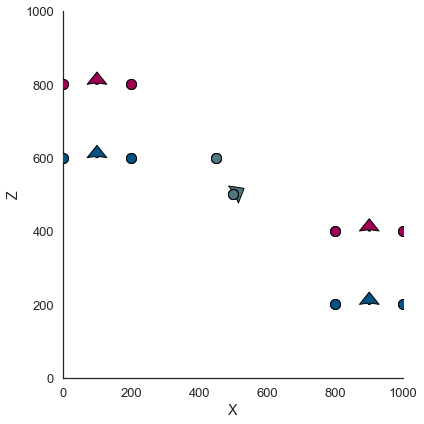

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [6]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!


In [7]:
sol = gp.compute_model(geo_data)

../../gempy/core/solution.py:266: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


Displaying the result in x and y direction:

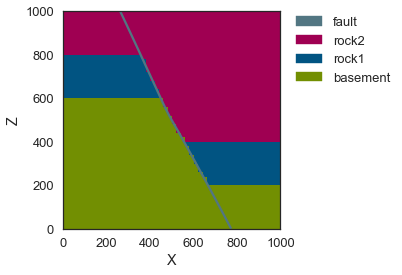

In [8]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='y', show_data=False, show_all_data=True)

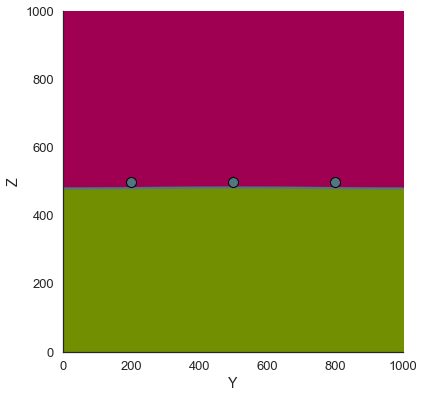

In [9]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

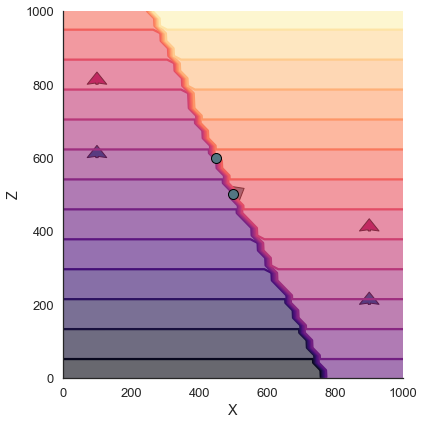

In [10]:
%matplotlib inline
gp.plot.plot_scalar_field(geo_data, cell_number=25, series=1,
                         direction='y', show_data=True)

In [11]:
geo_data.series

,order_series,BottomRelation
Fault_Series,1,Fault
Strat_Series,2,Erosion
Basement,3,Erosion


In [12]:
geo_data.interpolator.theano_graph.is_erosion.get_value()

array([0, 0])